<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_8_(AMAZON)_MRM_10_Feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Summary Statistics:
            overall  unixReviewTime     day_diff  helpful_yes   total_vote
count  4915.000000    4.915000e+03  4915.000000  4915.000000  4915.000000
mean      4.587589    1.379465e+09   437.367040     1.311089     1.521465
std       0.996845    1.581857e+07   209.439871    41.619161    44.123095
min       1.000000    1.339200e+09     1.000000     0.000000     0.000000
25%       5.000000    1.365898e+09   281.000000     0.000000     0.000000
50%       5.000000    1.381277e+09   431.000000     0.000000     0.000000
75%       5.000000    1.392163e+09   601.000000     0.000000     0.000000
max       5.000000    1.406074e+09  1064.000000  1952.000000  2020.000000
Number of unique reviewers: 4915
Average rating: 4.587589013224822


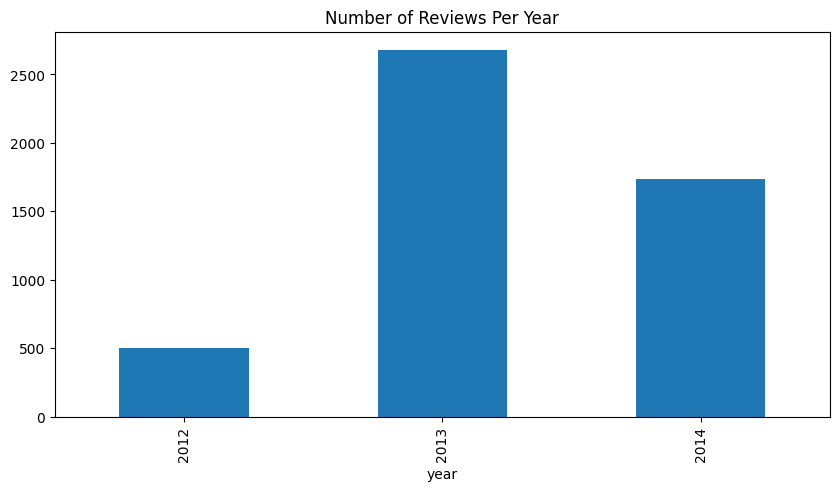

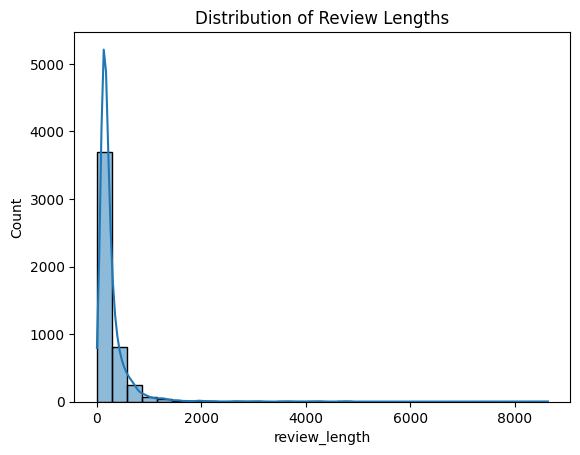

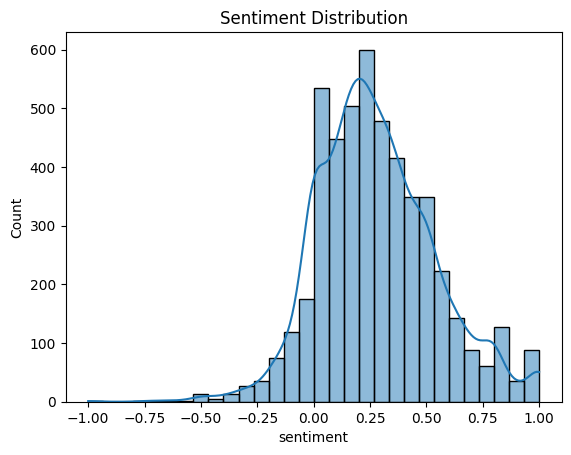

<ipython-input-1-12f85095a032>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['helpfulness_ratio'].fillna(0, inplace=True)


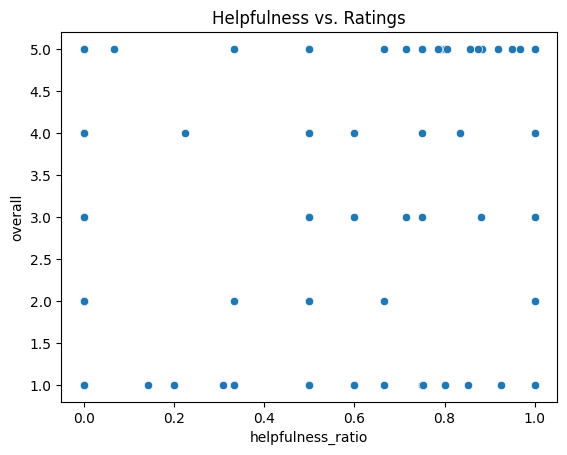

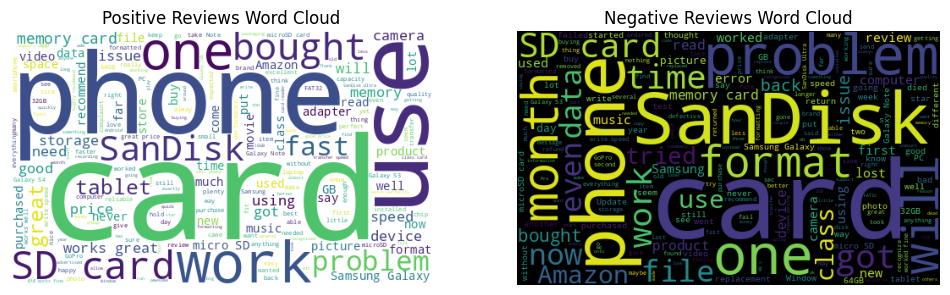

Most Common Words in Reviews: [('the', 8210), ('I', 7571), ('and', 7435), ('to', 6033), ('a', 5445), ('it', 5130), ('my', 4859), ('for', 3871), ('this', 3625), ('of', 3339), ('card', 3318), ('in', 3240), ('is', 3028), ('with', 2935), ('on', 2161), ('have', 2066), ('that', 1796), ('was', 1605), ('as', 1415), ('but', 1284)]
Prediction Accuracy: 0.9094608341810784


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("amazon_review.csv")

# 1. Descriptive Analysis
print("Basic Summary Statistics:\n", df.describe())
print("Number of unique reviewers:", df['reviewerID'].nunique())
print("Average rating:", df['overall'].mean())

# 2. Time-Based Analysis
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%d-%m-%Y')
df['year'] = df['reviewTime'].dt.year
plt.figure(figsize=(10, 5))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Reviews Per Year")
plt.show()

# 3. Review Length Analysis
df['review_length'] = df['reviewText'].astype(str).apply(len)
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title("Distribution of Review Lengths")
plt.show()

# 4. Sentiment Analysis
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['sentiment'] = df['reviewText'].apply(get_sentiment)
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Distribution")
plt.show()

# 5. Helpfulness Analysis
df['helpfulness_ratio'] = df['helpful_yes'] / (df['total_vote'] + 1e-5)
df['helpfulness_ratio'].fillna(0, inplace=True)
sns.scatterplot(x=df['helpfulness_ratio'], y=df['overall'])
plt.title("Helpfulness vs. Ratings")
plt.show()

# 6. Word Cloud for Positive & Negative Reviews
positive_reviews = " ".join(df[df['overall'] >= 4]['reviewText'].dropna())
negative_reviews = " ".join(df[df['overall'] <= 2]['reviewText'].dropna())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(positive_reviews))
plt.axis("off")
plt.title("Positive Reviews Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=500, height=300, background_color='black').generate(negative_reviews))
plt.axis("off")
plt.title("Negative Reviews Word Cloud")

plt.show()

# 7. Frequent Words in Reviews
words = " ".join(df['reviewText'].dropna()).split()
word_freq = Counter(words).most_common(20)
print("Most Common Words in Reviews:", word_freq)

# 8. Predicting Helpfulness using Machine Learning
df['is_helpful'] = (df['helpfulness_ratio'] > 0.5).astype(int)
features = df[['overall', 'review_length', 'sentiment']].fillna(0)
labels = df['is_helpful']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Prediction Accuracy:", accuracy_score(y_test, y_pred))


Basic Summary Statistics:
            overall  unixReviewTime     day_diff  helpful_yes   total_vote
count  4915.000000    4.915000e+03  4915.000000  4915.000000  4915.000000
mean      4.587589    1.379465e+09   437.367040     1.311089     1.521465
std       0.996845    1.581857e+07   209.439871    41.619161    44.123095
min       1.000000    1.339200e+09     1.000000     0.000000     0.000000
25%       5.000000    1.365898e+09   281.000000     0.000000     0.000000
50%       5.000000    1.381277e+09   431.000000     0.000000     0.000000
75%       5.000000    1.392163e+09   601.000000     0.000000     0.000000
max       5.000000    1.406074e+09  1064.000000  1952.000000  2020.000000
Number of unique reviewers: 4915
Average rating: 4.587589013224822


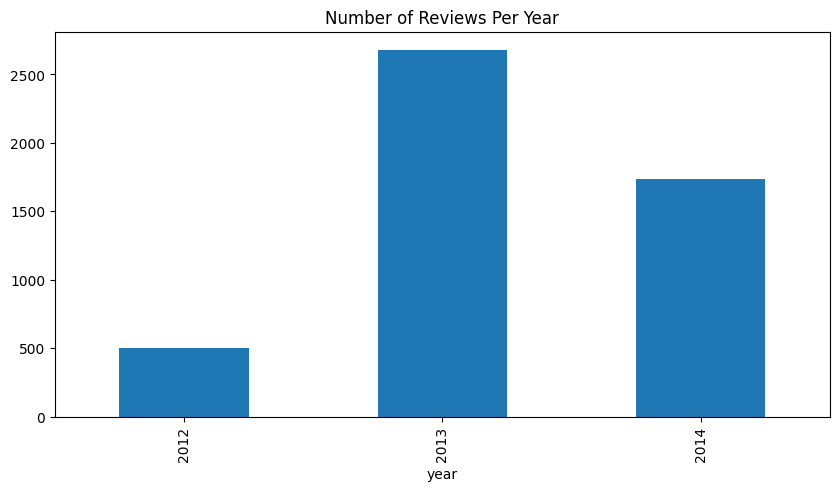

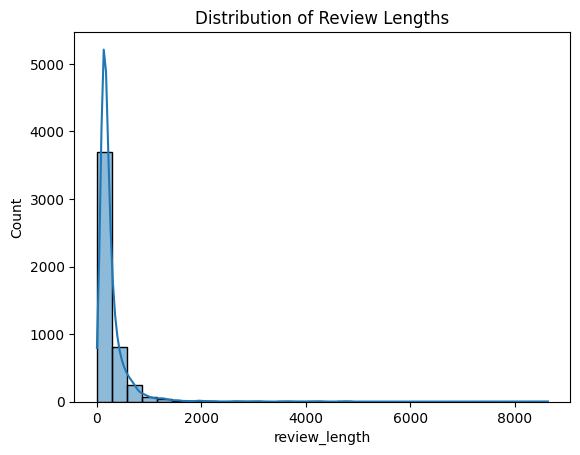

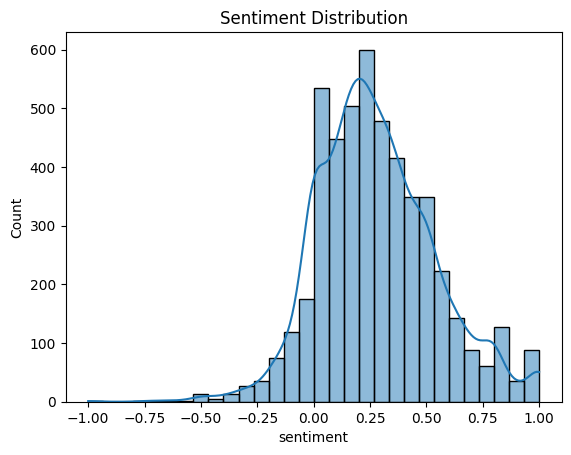

<ipython-input-2-4d44f3ced826>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment_category'], palette='coolwarm')


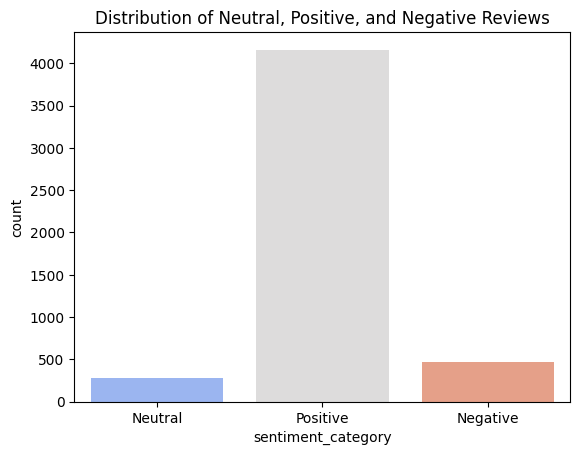

<ipython-input-2-4d44f3ced826>:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['helpfulness_ratio'].fillna(0, inplace=True)


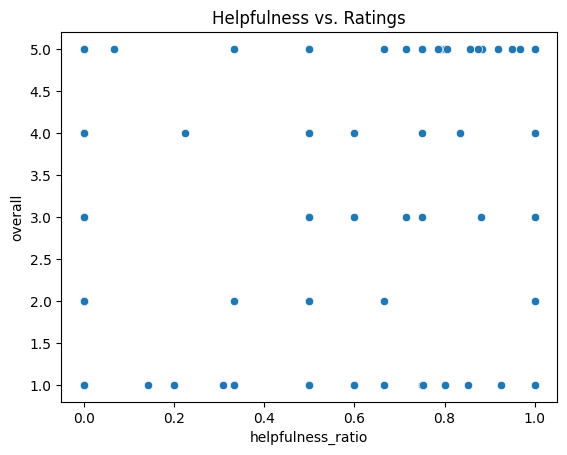

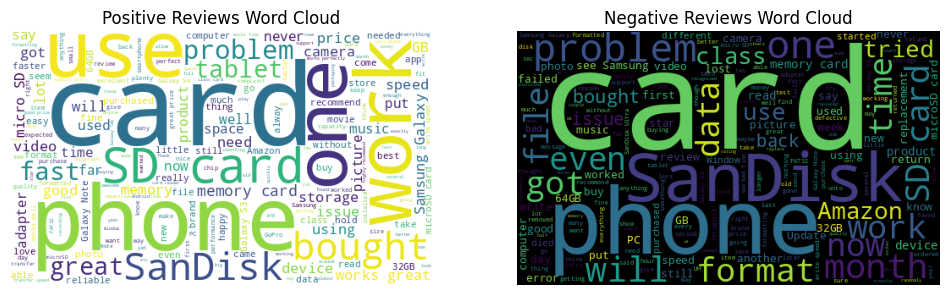

Most Common Words in Reviews: [('the', 8210), ('I', 7571), ('and', 7435), ('to', 6033), ('a', 5445), ('it', 5130), ('my', 4859), ('for', 3871), ('this', 3625), ('of', 3339), ('card', 3318), ('in', 3240), ('is', 3028), ('with', 2935), ('on', 2161), ('have', 2066), ('that', 1796), ('was', 1605), ('as', 1415), ('but', 1284)]
Prediction Accuracy: 0.9084435401831129
Review scores exported to review_scores.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("amazon_review.csv")

# 1. Descriptive Analysis
print("Basic Summary Statistics:\n", df.describe())
print("Number of unique reviewers:", df['reviewerID'].nunique())
print("Average rating:", df['overall'].mean())

# 2. Time-Based Analysis
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%d-%m-%Y')
df['year'] = df['reviewTime'].dt.year
plt.figure(figsize=(10, 5))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Reviews Per Year")
plt.show()

# 3. Review Length Analysis
df['review_length'] = df['reviewText'].astype(str).apply(len)
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title("Distribution of Review Lengths")
plt.show()

# 4. Sentiment Analysis
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['sentiment'] = df['reviewText'].apply(get_sentiment)
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Distribution")
plt.show()

# 4.1 Sentiment Classification
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
sns.countplot(x=df['sentiment_category'], palette='coolwarm')
plt.title("Distribution of Neutral, Positive, and Negative Reviews")
plt.show()

# 5. Helpfulness Analysis
df['helpfulness_ratio'] = df['helpful_yes'] / (df['total_vote'] + 1e-5)
df['helpfulness_ratio'].fillna(0, inplace=True)
sns.scatterplot(x=df['helpfulness_ratio'], y=df['overall'])
plt.title("Helpfulness vs. Ratings")
plt.show()

# 6. Word Cloud for Positive & Negative Reviews
positive_reviews = " ".join(df[df['overall'] >= 4]['reviewText'].dropna())
negative_reviews = " ".join(df[df['overall'] <= 2]['reviewText'].dropna())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(positive_reviews))
plt.axis("off")
plt.title("Positive Reviews Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=500, height=300, background_color='black').generate(negative_reviews))
plt.axis("off")
plt.title("Negative Reviews Word Cloud")

plt.show()

# 7. Frequent Words in Reviews
words = " ".join(df['reviewText'].dropna()).split()
word_freq = Counter(words).most_common(20)
print("Most Common Words in Reviews:", word_freq)

# 8. Predicting Helpfulness using Machine Learning
df['is_helpful'] = (df['helpfulness_ratio'] > 0.5).astype(int)
features = df[['overall', 'review_length', 'sentiment']].fillna(0)
labels = df['is_helpful']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Prediction Accuracy:", accuracy_score(y_test, y_pred))

# 9. Exporting Review Scores to Excel
df[['reviewerID', 'asin', 'overall', 'sentiment', 'sentiment_category', 'helpfulness_ratio']].to_excel("review_scores.xlsx", index=False)
print("Review scores exported to review_scores.xlsx")


In [ ]:
!pip install nrclex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=94219f5cf987e40bc987f26640f4bbc63940e7de3123220de661d23051d42ffc
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built nrclex


Basic Summary Statistics:
            overall  unixReviewTime     day_diff  helpful_yes   total_vote
count  4915.000000    4.915000e+03  4915.000000  4915.000000  4915.000000
mean      4.587589    1.379465e+09   437.367040     1.311089     1.521465
std       0.996845    1.581857e+07   209.439871    41.619161    44.123095
min       1.000000    1.339200e+09     1.000000     0.000000     0.000000
25%       5.000000    1.365898e+09   281.000000     0.000000     0.000000
50%       5.000000    1.381277e+09   431.000000     0.000000     0.000000
75%       5.000000    1.392163e+09   601.000000     0.000000     0.000000
max       5.000000    1.406074e+09  1064.000000  1952.000000  2020.000000
Number of unique reviewers: 4915
Average rating: 4.587589013224822


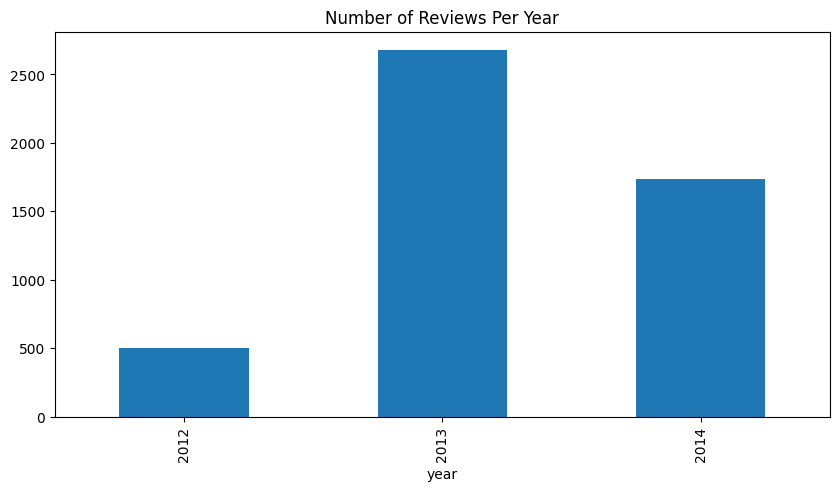

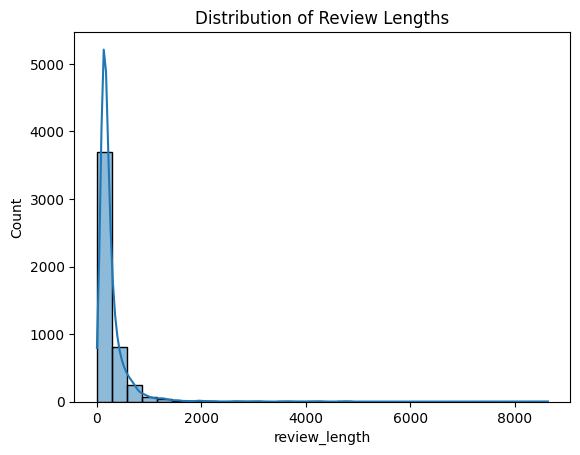

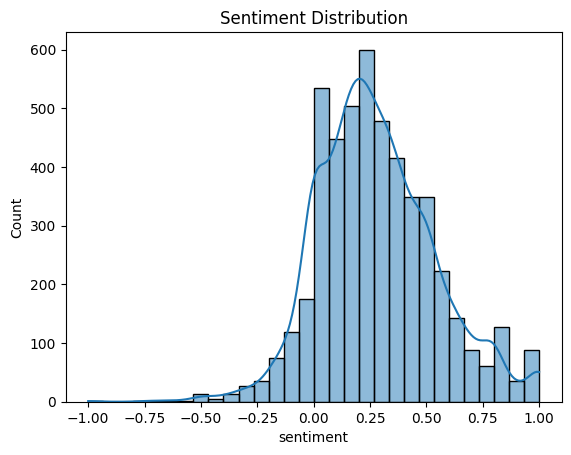

<ipython-input-11-22965c3f785b>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment_category'], palette='coolwarm')


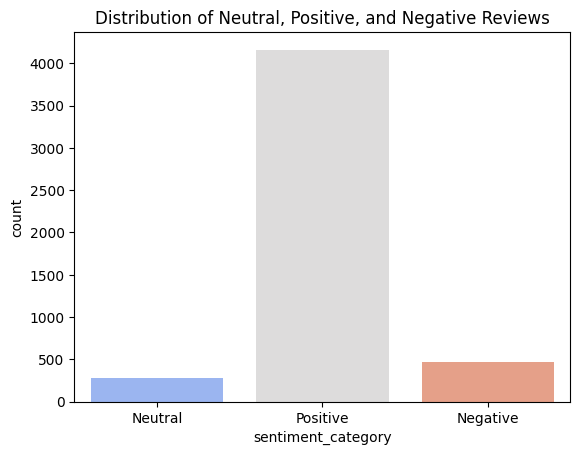

<ipython-input-11-22965c3f785b>:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['helpfulness_ratio'].fillna(0, inplace=True)


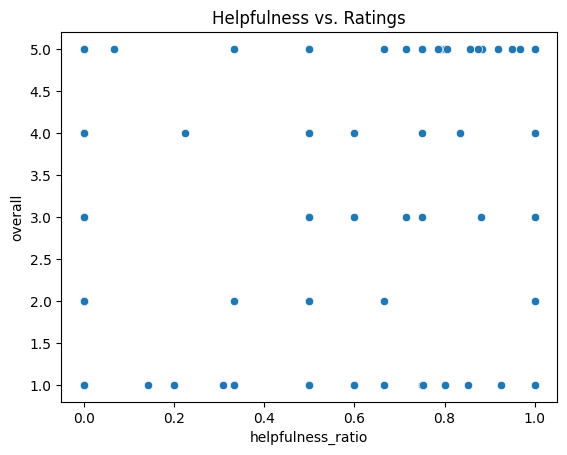

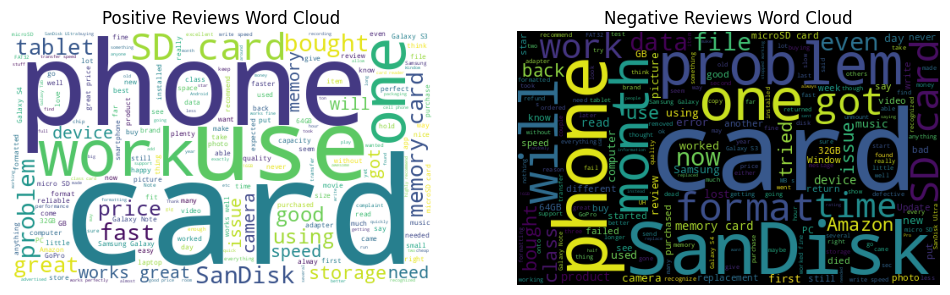

Most Common Words in Reviews: [('the', 8210), ('I', 7571), ('and', 7435), ('to', 6033), ('a', 5445), ('it', 5130), ('my', 4859), ('for', 3871), ('this', 3625), ('of', 3339), ('card', 3318), ('in', 3240), ('is', 3028), ('with', 2935), ('on', 2161), ('have', 2066), ('that', 1796), ('was', 1605), ('as', 1415), ('but', 1284)]
Prediction Accuracy: 0.9064089521871821


MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nrclex import NRCLex

# Load the dataset
df = pd.read_csv("amazon_review.csv")

# 1. Descriptive Analysis
print("Basic Summary Statistics:\n", df.describe())
print("Number of unique reviewers:", df['reviewerID'].nunique())
print("Average rating:", df['overall'].mean())

# 2. Time-Based Analysis
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%d-%m-%Y')
df['year'] = df['reviewTime'].dt.year
plt.figure(figsize=(10, 5))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Reviews Per Year")
plt.show()

# 3. Review Length Analysis
df['review_length'] = df['reviewText'].astype(str).apply(len)
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title("Distribution of Review Lengths")
plt.show()

# 4. Sentiment Analysis
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['sentiment'] = df['reviewText'].apply(get_sentiment)
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Distribution")
plt.show()

# 4.1 Sentiment Classification
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
sns.countplot(x=df['sentiment_category'], palette='coolwarm')
plt.title("Distribution of Neutral, Positive, and Negative Reviews")
plt.show()

# 5. Helpfulness Analysis
df['helpfulness_ratio'] = df['helpful_yes'] / (df['total_vote'] + 1e-5)
df['helpfulness_ratio'].fillna(0, inplace=True)
sns.scatterplot(x=df['helpfulness_ratio'], y=df['overall'])
plt.title("Helpfulness vs. Ratings")
plt.show()

# 6. Word Cloud for Positive & Negative Reviews
positive_reviews = " ".join(df[df['overall'] >= 4]['reviewText'].dropna())
negative_reviews = " ".join(df[df['overall'] <= 2]['reviewText'].dropna())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(positive_reviews))
plt.axis("off")
plt.title("Positive Reviews Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=500, height=300, background_color='black').generate(negative_reviews))
plt.axis("off")
plt.title("Negative Reviews Word Cloud")

plt.show()

# 7. Frequent Words in Reviews
words = " ".join(df['reviewText'].dropna()).split()
word_freq = Counter(words).most_common(20)
print("Most Common Words in Reviews:", word_freq)

# 8. Predicting Helpfulness using Machine Learning
df['is_helpful'] = (df['helpfulness_ratio'] > 0.5).astype(int)
features = df[['overall', 'review_length', 'sentiment']].fillna(0)
labels = df['is_helpful']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Prediction Accuracy:", accuracy_score(y_test, y_pred))

# 9. Emotion Analysis
def get_emotions(text):
    emotions = NRCLex(str(text)).affect_frequencies
    return emotions

df['emotions'] = df['reviewText'].apply(get_emotions)

# Aggregating emotions for visualization
emotion_counts = pd.DataFrame(df['emotions'].apply(pd.Series).mean()).reset_index()
emotion_counts.columns = ['Emotion', 'Frequency']

plt.figure(figsize=(12, 6))
sns.barplot(x='Emotion', y='Frequency', data=emotion_counts, palette='viridis')
plt.xticks(rotation=45)
plt.title("Emotion Analysis of Reviews")
plt.show()

# 10. Exporting Review Scores to Excel
df[['reviewerID', 'asin', 'overall', 'sentiment', 'sentiment_category', 'helpfulness_ratio', 'emotions']].to_excel("review_scores.xlsx", index=False)
print("Review scores exported to review_scores.xlsx")
